# Introduction

Recent advancements have proven to be beneficial to the field of conversational AI and Natural Language Processing (NLP). With the latest release of GPT-3 and advent of GPT-4, as well as the prominence of Large Language Models (LLMs) such as Microsoft T5 and Google's BERT, many tasks that have considered to be majorly solved through conventional approaches have been able to breach levels of performance previously unattainable. 

The question remains as to the ability to make use of these models in the every day world, and how it can pierce into the industry. Amongst these place would be the use of intelligent dialogue systems within service departments, where the understanding of context is critical to providing the right aid to customers often requiring time-sensitive intervention from experts. 

In this project, we will be exploring the improvements pre-trained models can bring by matching them next to ones that have been done in the past. We will be using the Ubuntu Dialogue Corpus, our goal will be to assess how well a model can provide context-relevant responses in an end-to-end dialogue system. these approaches while exploring the Ubuntu Dialogue Corpus [Citation] and training an End-to-End dialogue system.

# Task Description

The project's goal to is to create an end-to-end dialogue system using the Ubuntu Dialogue Corpus. Given the context of a multi-turn dialogue, the model should be able to produce a contextually accurate response back to the user. 

The Ubuntu Dialogue System was initially used in Next Utterance Classification (NUC) tasks. During training, the model is presented a context and was to classify the given utterance based on whether it was relevant to the prior statements. During the validation and test stages, the model is presented ten utterances, one of which is the ground truth, and must determine which of the responses is the correct one. The performance of this model is measured by its Recall@k, with k corresponding the most likely responses to the given context retrieved at test time.

As our task involves the generation of a new response rather than its retrieval, the objective of the task deviates from that of the original paper. Instead, the model will be trained only from the real responses given within the multi-turn dialogues, while validation and test will evaluate the model based on how relevant the generated text is to the context compared to the original text.

[Add some equation here]

# Dataset

## Ubuntu Dialogue Corpus

The Ubuntu Dialogue Dataset was created from a compilation of over 1.3 million dialogues out of an IRC chat between users and support agents. The conversations are considered dyadic, meaning they typically happen between two people. As well, there are other things that are important like the fact that the chats are mixed in together. 

[Insert a picture of how it should look and stuff]

The process to create the dataset was to primarily untangle the conversation such that one set of utterances deal with one topic

The training dataset has three fields: context, representing the preceding conversation utterance; response, being the target utterance to the conversation; and label, which determines whether the response is contextual to the previous utterances. For our set task, the non-contextual samples (with a label value of 0) are sampled out from the other utterances in the dataset. 

An examination of the responses produced by the generative models reveals similar shortcomings; while the models are able to generate reasonable responses, they are often generic or lack a semantic understanding of the context. It is clear that end-to-end systems are not close to solving a domain as complex as Ubuntu (Lowe)

## Training Dataset

As for the validation and test dataset, 11 columns are provided: the context, similar to the training set's; the ground truth utterance, which correspond to the actual utterance that written by the speaker; and nine distractors, corresponding to different utterances sampled out of other conversations. For our set task, only the ground truth utterance will be kept, as we will attempt at getting a most similar response to that of the human conversationalists.

## Preprocessing

In order to make use of the text, some preprocessing techniques were used to ensure the best features are extracted by our end to end system.

### Data Cleaning

Conversations made from chat rooms such as those found in the UDC can often be riddled with special characters to denote emotions or flavor to a text. While it may be interesting to determine the importance of these inclusions, we decided to omit these in order to limit to actual sentence constructions out of the tokens used. 

### Path replacements

Due to the nature of the Ubuntu Support community, discussions invite the heavy use of different Internet URLs and directory paths. We opted to generalize them under control tokens (`__url__` and `__path__`), reducing the amount of vocabulary that would have been generated the vast majority of unique tokens. The same approach is carried over for cardinal numbers. 

# Feature Extraction

Natural Language Processing models rely on the features extracted from words used in the datasets in order to linearly separate them. However, unlike acoustic or visual data, where numerical values are readily available from frequencies or color values, words must be interpreted in a numerical space to infer relations between them. The interpretation can be quite subjective, and as such, many approaches exist to ensure the tokenization process leads to features that can correctly represent the data based on the task presented.

# Word2vec / GLoVe

Global Vectors for Word Representation (GloVe) is an unsupervised learning algorithm for obtaining vector representations. The representations are retrieved by compiling statistics of word to word co-occurrences within a corpus. Multiple pre-trained models have been built based on an number of data sources such as Wikipedia, Common Crawl and Twitter, with several sets ranging between six and 840 billion tokens, and vocabulary lengths from four hundred thousand upwards to 2.2 million unique words.

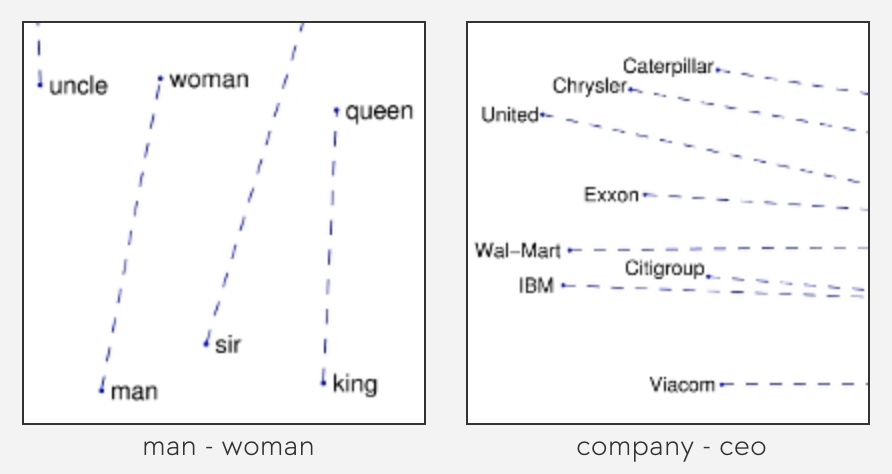

GloVe leverages the benefits found within the Word2Vec algorithm by providing a list of embeddings readily available to be fine-tune for a downstream task. However, to disadvantages come up as to the use of the representation for the UDC. For one, the use of the larger GloVe models is relatively demanding computationally; the largest vocabulary trained with a dimensionality of 300 represent about 660 million unique values in the embedding table, and can be intensive when the model is not frozen. In addition, the unique nature of the conversations found inside the UDC results in many out-of-vocabulary words resulting in a lack of representation for the bridge, with about 22% only being represented out of the box [(Jianxiong Dong, Jim Huang, _Enhance word representation for out-of-vocabulary on Ubuntu dialogue corpus_, 2018)](https://arxiv.org/pdf/1802.02614.pdf).

# SentencePiece

Created by Google, SentencePiece is an alternative tokenization algorithm which processes with a pre-determined vocabulary size. It's particularity is that of tokenizing subwords, which helps in categorizing out-of-vocabulary words that may not have been seen prior to training. The technique is commonly used amongst LLMs due to its reliability and efficiency.

# Approaches

## Encoder-Decoder RNN with LSTM 

As a baseline, we've set up an encoder-decoder recurrent neural network (RNN) with long short-term memory (LSTM) cells. The use of the LSTM cells helps in retaining long-term dependencies, which can benefit greatly to acquiring context of a discussion. As an input, the Encoder receives only the last utterance from the discussion, hence disregarding the entire discussion that has been going thus far. The tokens are encoded using the Speechbrain's SentencePiece encoder, with the embeddings found inside Pytorch's Embedding module. The Decoder is an Attentional RNN which takes in the last encoded layer of the RNN alongside the embeddings of the ground truth response of the samples appended with the end of sentence symbol.k

## Hierarchical Recurrent Encoder-Decoder (HRED)


## GPT-2 Transformer

As a final approach is to replace the encoder-decoder for a pretrained transformer using OpenAI's Generative Pre-trained Transformer (GPT). (Give an explanation as to why we chose GPT-2) 

Unlike the Encoder-Decoder, GPT-2 only takes in one input to finetune for the downstream task. We've adjusted the input in order to accomodate for it.

Previous input: Context -> Response
New input: <|context|>Context<|response|>Response

# Results and Observations

[Insert Table]

To measure the performance of each model, the Word Error Rate (WER) metric has been implemented after the end of each epoch. Training has been done on 100,000 samples to limit the training time necessary to get to a worthwhile conclusion. Amongst the models, the GPT-2 pretrained model performed at a higher  

